In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


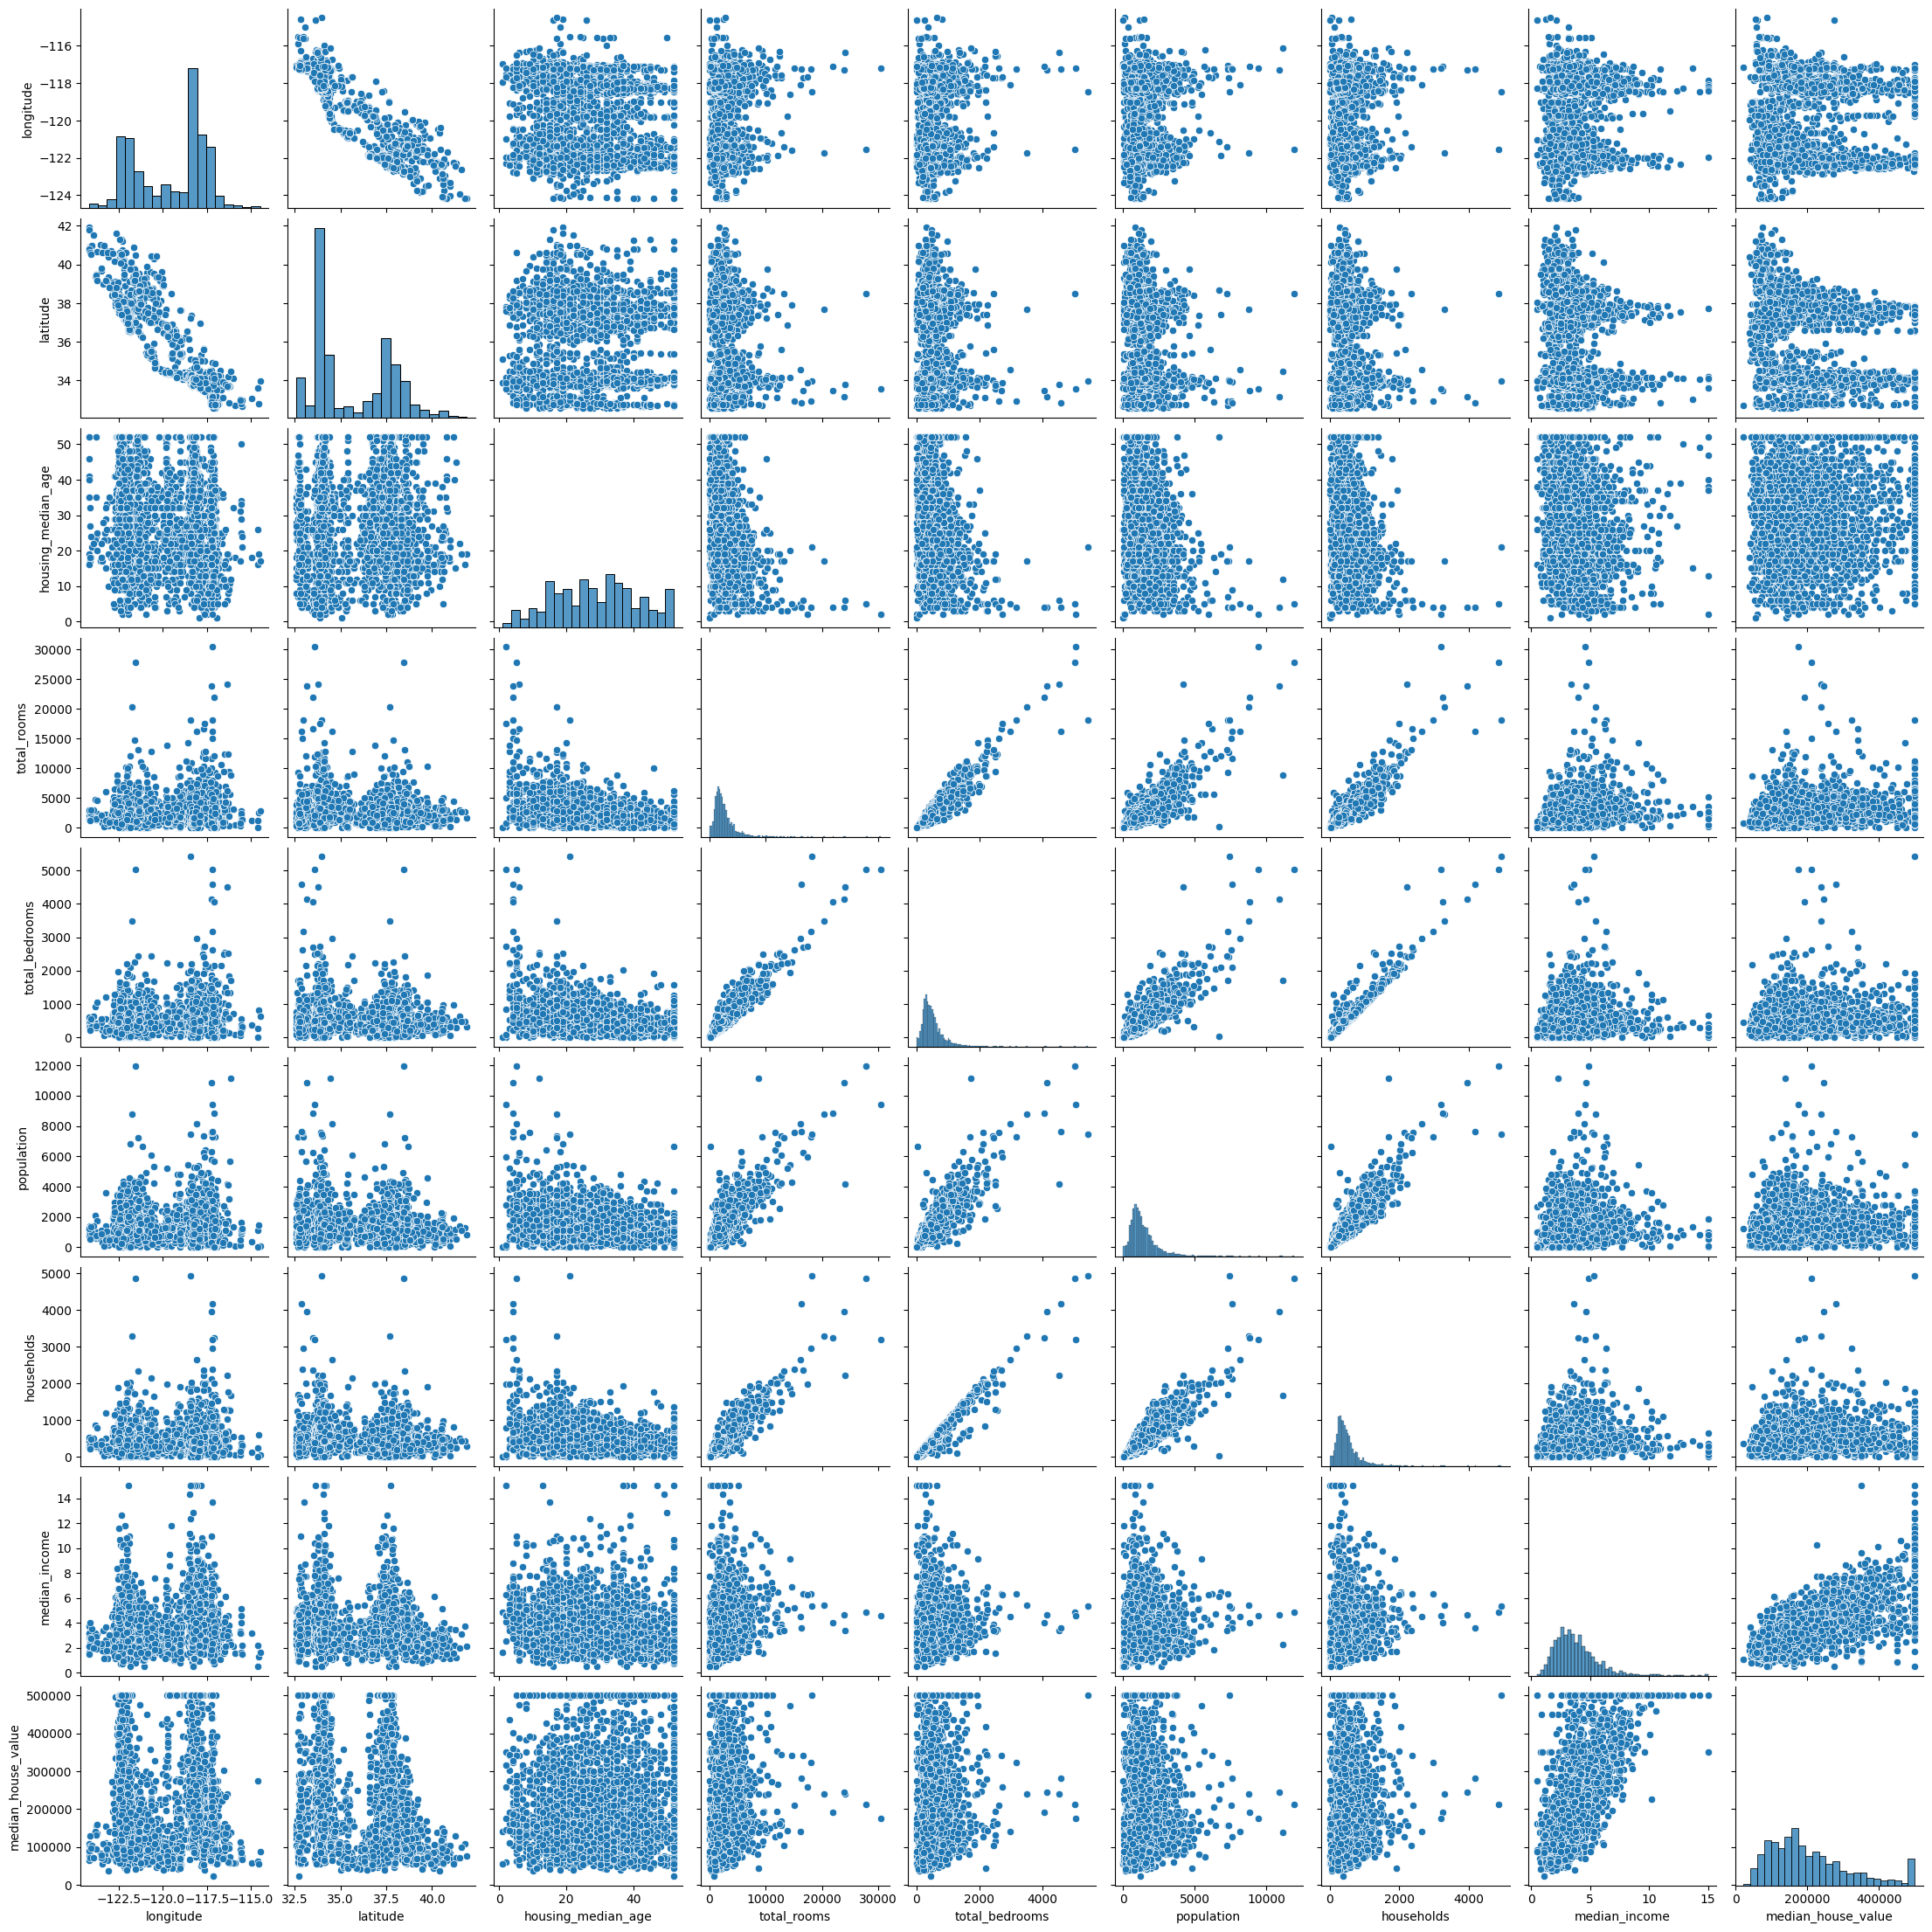

In [6]:
sns.pairplot(df)

<Axes: >

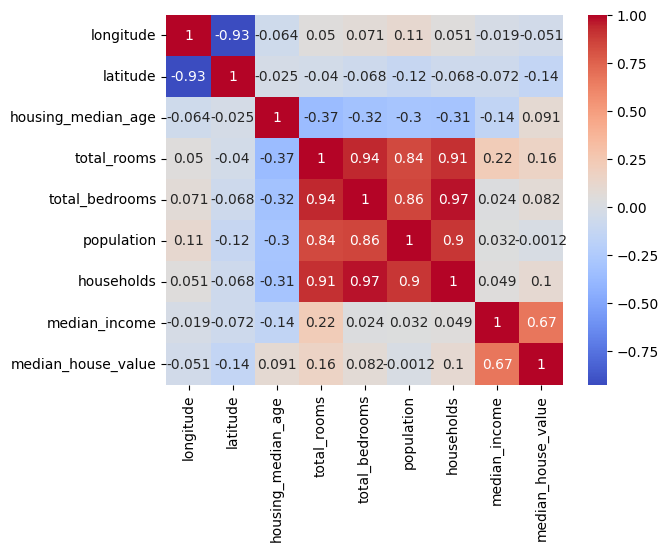

In [8]:
corr_=df.corr()
sns.heatmap(corr_,annot=True,cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)
df

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.51769249,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  2.67940935,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ...,  1.51769249,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.80574124,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.80574124,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.80574124,
        -0.55403469,  1.22296203]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df=mm.fit_transform(df)
df

array([[1.        , 0.39656357, 0.6       , ..., 0.66666667, 1.        ,
        0.        ],
       [0.90909091, 0.5024055 , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.90909091, 0.57113402, 0.4       , ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.        , 0.13539519, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.08659794, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15120275, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x=df[:,:-1]
y=df[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([0.55164499, 0.45410022, 0.56150897, 0.49160323, 0.70420244,
       0.47242608, 0.56593826, 0.69859161, 0.63393339, 0.37127174,
       0.47857251, 0.61796552, 0.62963864, 0.57601747, 0.59008582,
       0.72912997, 0.60304186, 0.64387552, 0.67526406, 0.53993464,
       0.52841563, 0.48493287, 0.47070648, 0.71335137, 0.506984  ,
       0.43540028, 0.44515469, 0.48297249, 0.55222983, 0.47789399,
       0.59180183, 0.6085922 , 0.41535689, 0.6428056 , 0.6497932 ,
       0.49757949, 0.22624892, 0.60635369, 0.71044361, 0.53371044,
       0.34198933, 0.62716284, 0.56276934, 0.64103999, 0.5631877 ,
       0.45479973, 0.46342364, 0.67843283, 0.54521262, 0.30359243,
       0.5827935 , 0.50549277, 0.67336664, 0.64559061, 0.63218221,
       0.58868531, 0.53407249, 0.46379238, 0.6471382 , 0.57154741,
       0.57476784, 0.47357513, 0.71665735, 0.43192627, 0.71745451,
       0.45737902, 0.22681308, 0.65826599, 0.57232787, 0.49204542,
       0.61311846, 0.43966926, 0.55426169, 0.4648282 , 0.56033

In [ ]:
from sklearn.feature_selection import RFE
lr=LinearRegression()
rfe=RFE(lr,n_features_to_select=10)
rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False  True  True False]
[1 1 1 1 1 1 1 1 2 1 1 3]


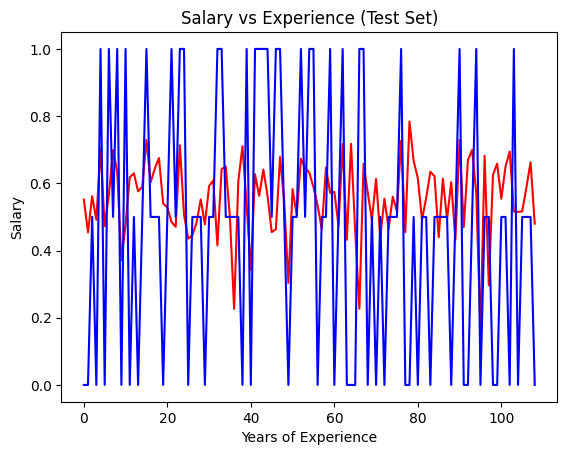

In [ ]:
plt.plot(y_pred,color='red')
plt.plot(y_test,color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()